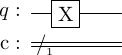

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')

circuit = QuantumCircuit(q, c)

circuit.x(q[0])

circuit.draw('mpl')




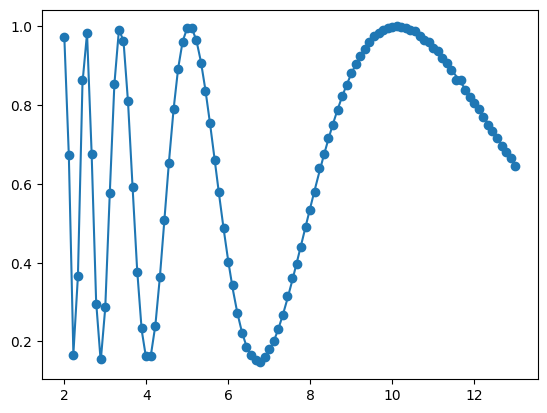

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qiskit as q
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, IBMQ, Aer
from qiskit.tools.monitor import job_monitor

%matplotlib inline

pi = np.pi

# provider = IBMQ.load_account()
backend = Aer.get_backend('qasm_simulator')

q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')

h = 6.626e-34
hbar = h / (2 * pi)
sol = 299792458

charge = 1.6e-19

theta = 0.587  # Mixing angle (in radians)
delta_m_squared = 2.5e-3 # Difference of squares of masses (in eV^2)
L = 10 # 100 * 1e+3  # Distance traveled by the neutrino (in km)
E = 0.1 # 0.001 * 1e+9  # Energy of the neutrino (in GeV)

def osc_prob(E):
    circuit = QuantumCircuit(q,c)
    
    # phi = - ((delta_m_squared/sol) * L)/(2 * E * (hbar/charge)) # 0.1 # - ((delta_m_squared/sol) * L)/(2 * E * (hbar/charge))
    
    phi = - 2 * ((1.27 * delta_m_squared * L)/E)
    
    # print((1.27 * delta_m_squared * 1)/0.1)
    
    # print(((delta_m_squared/sol) * L)/(2 * E * (hbar/charge)))

    circuit.u(2 * theta, 0, 0, q[0]) # rotate to mass basis
    circuit.p(phi, q[0])
    circuit.u(-2 * theta, 0, 0, q[0])
    circuit.measure(q[0],c[0])
    
    # display(circuit.draw('mpl'))

    shots = 10000
    job = execute(circuit, backend, shots=shots)

    counts = job.result().get_counts()
    
    prob = counts['0']/shots
    
    return prob

def theoretical_osc_prob(E):
    # phi = - ((delta_m_squared/sol) * L)/(2 * E * (hbar/charge)) # 0.1 #- ((delta_m_squared/sol) * L) / (4 * E * (hbar/charge))
    phi = ((1.27 * delta_m_squared * L)/E)
    return 1 - (np.sin(2 * theta) * np.sin(phi))**2

x = np.linspace(2, 13, 100)

tprobs = [theoretical_osc_prob(en * 1e-3) for en in x]
eprobs = [osc_prob(en * 1e-3) for en in x]
    
plt.plot(x, tprobs)
plt.scatter(x, eprobs)
plt.show()